### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# We'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# We'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module
# Import the citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
cities

['clyde river',
 'atuona',
 'hamilton',
 'nizhneyansk',
 'vagay',
 'talkha',
 'dickinson',
 'busselton',
 'samarai',
 'cabo san lucas',
 'aykhal',
 'albany',
 'vestmannaeyjar',
 'rikitea',
 'bambous virieux',
 'panguna',
 'pahrump',
 'severo-kurilsk',
 'port alfred',
 'mpika',
 'kyra',
 'hays',
 'alice springs',
 'castro',
 'presidencia roque saenz pena',
 'atchison',
 'ushuaia',
 'vanavara',
 'pisco',
 'longyearbyen',
 'hermanus',
 'hilo',
 'mount gambier',
 'saint-philippe',
 'praia',
 'banda aceh',
 'wajir',
 'poum',
 'belushya guba',
 'vaini',
 'thinadhoo',
 'north bend',
 'punta arenas',
 'ekhabi',
 'kaitangata',
 'xining',
 'sao joao da barra',
 'khatanga',
 'antalaha',
 'kapaa',
 'cape town',
 'new norfolk',
 'mataura',
 'dalvik',
 'tasiilaq',
 'wangqing',
 'noumea',
 'constitucion',
 'trairi',
 'narsaq',
 'bluff',
 'east london',
 'sokolo',
 'paradwip',
 'jinchengjiang',
 'regina',
 'athabasca',
 'aklavik',
 'manokwari',
 'vilhena',
 'husavik',
 'tiksi',
 'ribeira grande',
 'so

In [9]:
import requests
requests.__version__

'2.25.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
city_data = []

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | vagay
Processing Record 6 of Set 1 | talkha
Processing Record 7 of Set 1 | dickinson
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | panguna
Processing Record 17 of Set 1 | pahrump
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | mpika
Processing Record 21 of Set 1 | kyra
Processing Record 22 of Set 1 | hays
Processin

Processing Record 38 of Set 4 | tucuman
Processing Record 39 of Set 4 | manaquiri
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | aktash
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | boa vista
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | princeton
Processing Record 46 of Set 4 | havoysund
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | uray
Processing Record 49 of Set 4 | deh rawud
City not found. Skipping...
Processing Record 50 of Set 4 | maryborough
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | waren
Processing Record 3 of Set 5 | yellowknife
Processing Record 4 of Set 5 | nishihara
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | bayan
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | san andres
Pro

Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | northam
Processing Record 29 of Set 8 | cap-aux-meules
Processing Record 30 of Set 8 | celestun
Processing Record 31 of Set 8 | torbay
Processing Record 32 of Set 8 | tubruq
City not found. Skipping...
Processing Record 33 of Set 8 | male
Processing Record 34 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 35 of Set 8 | linxia
Processing Record 36 of Set 8 | datong
Processing Record 37 of Set 8 | tuktoyaktuk
Processing Record 38 of Set 8 | katobu
Processing Record 39 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 40 of Set 8 | dunedin
Processing Record 41 of Set 8 | dudinka
Processing Record 42 of Set 8 | rio pardo de minas
Processing Record 43 of Set 8 | zhicheng
Processing Record 44 of Set 8 | norfolk
Processing Record 45 of Set 8 | tucuru
Processing Record 46 of Set 8 | flinders
Processing Record 47 of Set 8 | altamira


Processing Record 17 of Set 12 | mergui
City not found. Skipping...
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | fortuna
Processing Record 20 of Set 12 | sungaipenuh
Processing Record 21 of Set 12 | guangzhou
Processing Record 22 of Set 12 | milkovo
Processing Record 23 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 12 | weligama
Processing Record 25 of Set 12 | iisalmi
Processing Record 26 of Set 12 | bariadi
Processing Record 27 of Set 12 | coihueco
Processing Record 28 of Set 12 | malpe
Processing Record 29 of Set 12 | wenling
Processing Record 30 of Set 12 | guaruja
Processing Record 31 of Set 12 | kasane
Processing Record 32 of Set 12 | sekoma
Processing Record 33 of Set 12 | seybaplaya
Processing Record 34 of Set 12 | coron
Processing Record 35 of Set 12 | bulawayo
Processing Record 36 of Set 12 | laukaa
Processing Record 37 of Set 12 | chumikan
Processing Record 38 of Set 12 | fortuna foothills
Process

In [15]:
len(city_data)

553

### Create a DataFrame

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,37.63,87,75,14.97,CA,2021-07-24 00:55:51
1,Atuona,-9.8000,-139.0333,77.02,78,25,11.14,PF,2021-07-24 00:50:57
2,Hamilton,39.1834,-84.5333,78.89,77,13,3.62,US,2021-07-24 00:54:13
3,Vagay,57.9375,69.0217,62.92,97,100,4.27,RU,2021-07-24 00:55:52
4,Talkha,31.0539,31.3779,72.28,77,0,6.08,EG,2021-07-24 00:55:52
...,...,...,...,...,...,...,...,...,...
548,Kahului,20.8947,-156.4700,85.26,79,15,8.99,US,2021-07-24 00:55:15
549,Arroyo,41.6096,-4.7969,63.59,65,0,5.75,ES,2021-07-24 00:59:01
550,Caucaia,-3.7361,-38.6531,80.55,75,40,12.66,BR,2021-07-24 00:59:02
551,Riachao Das Neves,-11.7461,-44.9100,70.09,48,77,2.55,BR,2021-07-24 00:59:03


In [17]:
# we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, 
# and Wind Speed, so they are easy to read

new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-07-24 00:55:51,70.4692,-68.5914,37.63,87,75,14.97
1,Atuona,PF,2021-07-24 00:50:57,-9.8000,-139.0333,77.02,78,25,11.14
2,Hamilton,US,2021-07-24 00:54:13,39.1834,-84.5333,78.89,77,13,3.62
3,Vagay,RU,2021-07-24 00:55:52,57.9375,69.0217,62.92,97,100,4.27
4,Talkha,EG,2021-07-24 00:55:52,31.0539,31.3779,72.28,77,0,6.08
...,...,...,...,...,...,...,...,...,...
548,Kahului,US,2021-07-24 00:55:15,20.8947,-156.4700,85.26,79,15,8.99
549,Arroyo,ES,2021-07-24 00:59:01,41.6096,-4.7969,63.59,65,0,5.75
550,Caucaia,BR,2021-07-24 00:59:02,-3.7361,-38.6531,80.55,75,40,12.66
551,Riachao Das Neves,BR,2021-07-24 00:59:03,-11.7461,-44.9100,70.09,48,77,2.55


In [20]:
# We'll create an output file to save the DataFrame as a CSV in a new folder for that file

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
# The line in the code block will export the DataFrame to a CSV file
# Index label (or column A) header as "City_ID."
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

In [21]:
# We'll retrieve the data we need to create our scatter plots
# Need latitude, maximum temperature, humidity, cloudiness and wind speed

# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df ["Lat"]
max_temps = city_data_df ["Max Temp"]
humidity = city_data_df ["Humidity"]
cloudiness = city_data_df ["Cloudiness"]
wind_speed = city_data_df ["Wind Speed"]


In [22]:
# To add the current date, we will need to import the time module

# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1627088482.8452299

In [23]:
# We can convert the datetime stamp
today = time.strftime("%x")
today

'07/23/21'

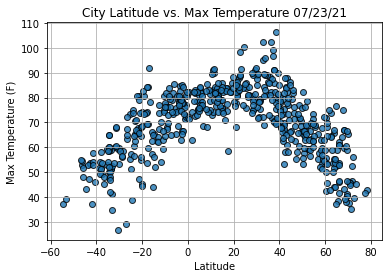

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity


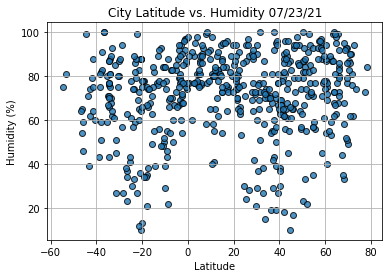

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness


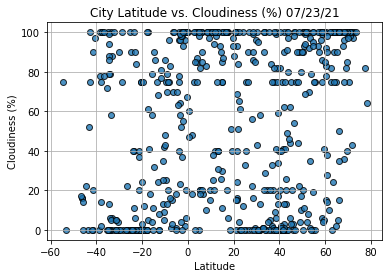

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

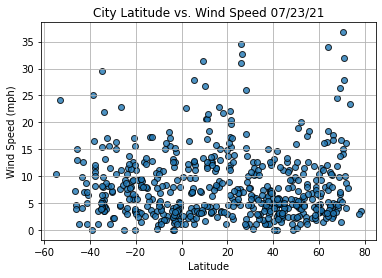

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Use Linear Regression to Find the Relationship Between Variables

In [28]:
# Create the Hemisphere DataFrames
# We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
## The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array.
## sintax = row = df.loc[row_index]

index13 = city_data_df.loc[13]
index13

City              Bambous Virieux
Country                        MU
Date          2021-07-24 00:55:08
Lat                      -20.3428
Lng                       57.7575
Max Temp                    68.25
Humidity                       88
Cloudiness                     75
Wind Speed                   3.44
Name: 13, dtype: object

In [29]:
# We can also filter a DataFrame based on a value of a row. 
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
548     True
549     True
550    False
551    False
552     True
Name: Lat, Length: 553, dtype: bool

In [30]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-07-24 00:55:51,70.4692,-68.5914,37.63,87,75,14.97
2,Hamilton,US,2021-07-24 00:54:13,39.1834,-84.5333,78.89,77,13,3.62
3,Vagay,RU,2021-07-24 00:55:52,57.9375,69.0217,62.92,97,100,4.27
4,Talkha,EG,2021-07-24 00:55:52,31.0539,31.3779,72.28,77,0,6.08
5,Dickinson,US,2021-07-24 00:54:14,29.4608,-95.0513,91.18,72,1,1.01
...,...,...,...,...,...,...,...,...,...
546,Yunyang,CN,2021-07-24 00:54:01,33.4474,112.7142,80.78,87,90,5.48
547,Draganesti-Vlasca,RO,2021-07-24 00:59:01,44.1014,25.5981,71.11,55,46,3.06
548,Kahului,US,2021-07-24 00:55:15,20.8947,-156.4700,85.26,79,15,8.99
549,Arroyo,ES,2021-07-24 00:59:01,41.6096,-4.7969,63.59,65,0,5.75


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2021-07-24 00:55:51,70.4692,-68.5914,37.63,87,75,14.97
2,Hamilton,US,2021-07-24 00:54:13,39.1834,-84.5333,78.89,77,13,3.62
3,Vagay,RU,2021-07-24 00:55:52,57.9375,69.0217,62.92,97,100,4.27
4,Talkha,EG,2021-07-24 00:55:52,31.0539,31.3779,72.28,77,0,6.08
5,Dickinson,US,2021-07-24 00:54:14,29.4608,-95.0513,91.18,72,1,1.01
...,...,...,...,...,...,...,...,...,...
546,Yunyang,CN,2021-07-24 00:54:01,33.4474,112.7142,80.78,87,90,5.48
547,Draganesti-Vlasca,RO,2021-07-24 00:59:01,44.1014,25.5981,71.11,55,46,3.06
548,Kahului,US,2021-07-24 00:55:15,20.8947,-156.4700,85.26,79,15,8.99
549,Arroyo,ES,2021-07-24 00:59:01,41.6096,-4.7969,63.59,65,0,5.75


In [99]:
# Linear regression is used to find a relationship between a dependent variable and one or more independent variables

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


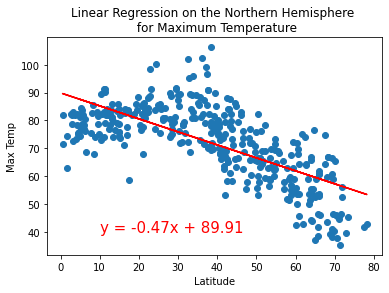

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [101]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


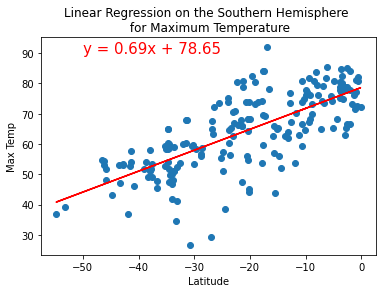

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

### Summary
The correlation between latitude and maximum temperature is moderate to very strong, as the r-value is less than -0.5 for the northern hemisphere and around 0.7 for the southern hemisphere, as shown in the graphs here. This means that as we get closer to the equator, at 0° latitude, temperatures become warmer. And when we are further from the equator the temperatures become cooler.

Exactly –1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0. No linear relationship

+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

Exactly +1. A perfect uphill (positive) linear relationship

### Find the Correlation Between Latitude and Percent Humidity

In [103]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()

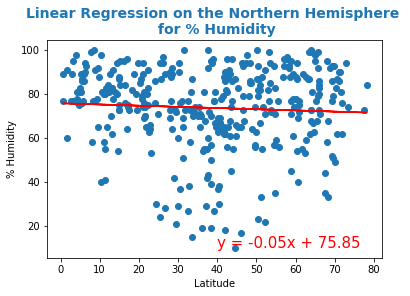

In [104]:
# Para realizar la regresión lineal sobre el porcentaje de humedad para el hemisferio norte, establezca el valor x igual a la columna de latitud y el valor y igual a la columna de humedad 
# del DataFrame northern_hemi_df.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [105]:
# Salto de linea y la tabulación a la vez:
print('hola\tmundo\nhola\tpython')

hola	mundo
hola	python


In [109]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':12, 'color':'tab:blue'})
    plt.show()

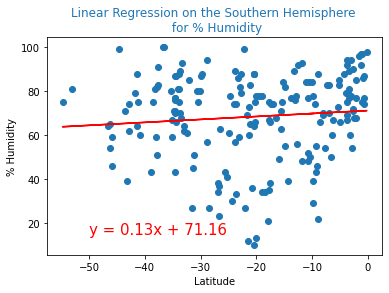

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

### Finding
The correlation between the latitude and percent humidity is moderate for the Northern because the r-value is 
0.05 and very low for Southern Hemispheres because the r-value is around 0.1 for the plots shown here. 
This means that percent humidity is unpredictable due to changing weather patterns 
that can increase or decrease percent humidity.  

## Find the Correlation Between Latitude and Percent Cloudiness

In [121]:

# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()


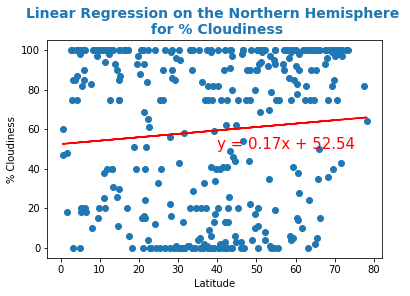

In [134]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,50))

In [117]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()


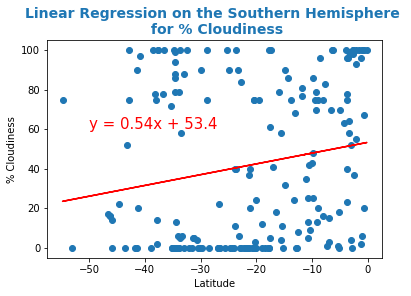

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

In [135]:
# Perform Linear Regression on the Northern Hemisphere for Wind Speed

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()

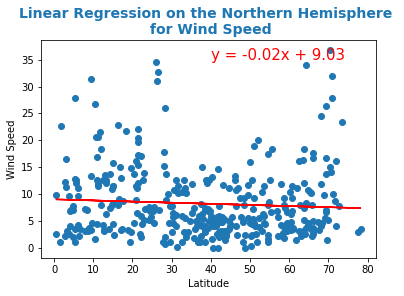

In [137]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [138]:
# Perform Linear Regression on the Southern Hemisphere for Wind Speed

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()

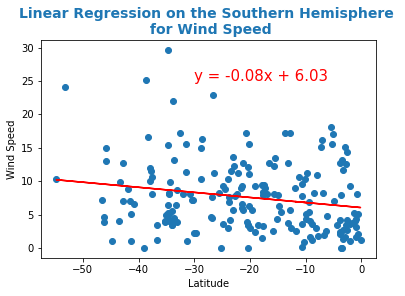

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,25))